# Demonstrations

In [1]:
import numpy as np                                                              
import matplotlib.pyplot as plt 
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout as tree_layout

import utils as u
import linearModels as lm
import neuralNet as nn
from decisionTrees import DecisionTree

np.random.seed(0) # 0 ok

# Linear Models

## Models on different data sets

In [2]:
def run(model, n, plotting=False, axes=None, nTestPoints=1000):
    '''
    A function that generates some data, and judges a models
    performance in trying to learn this data. Turning plotting on
    will generate graphs of these performance metrics, which can
    optionally be plotted on specified axes. E_out is estimated
    with nTestPoints.
    '''
    f, line1 = u.genF()
    X, Y = u.genData(f, n)
    it, E_ins = model.fit(X, Y)
    
    if plotting:
        if axes is None:
            fig, axes = plt.subplots(2, 1, figsize=(8,8))
        u.plotE_ins(E_ins, axis=axes[0])
        u.plotLine(*line1, axis=axes[1], label='Target')
        u.plotLine(*model.boundary2D(), \
                   axis=axes[1], color='g', label='Hypothesis')
        u.quickScatter(X, Y, axis=axes[1])
        axes[1].set_xlim([-1, 1]); axes[1].set_ylim([-1, 1])
        
    X2, Y2 = u.genData(f, nTestPoints)
    return it, model.findE_in(X2, Y2)

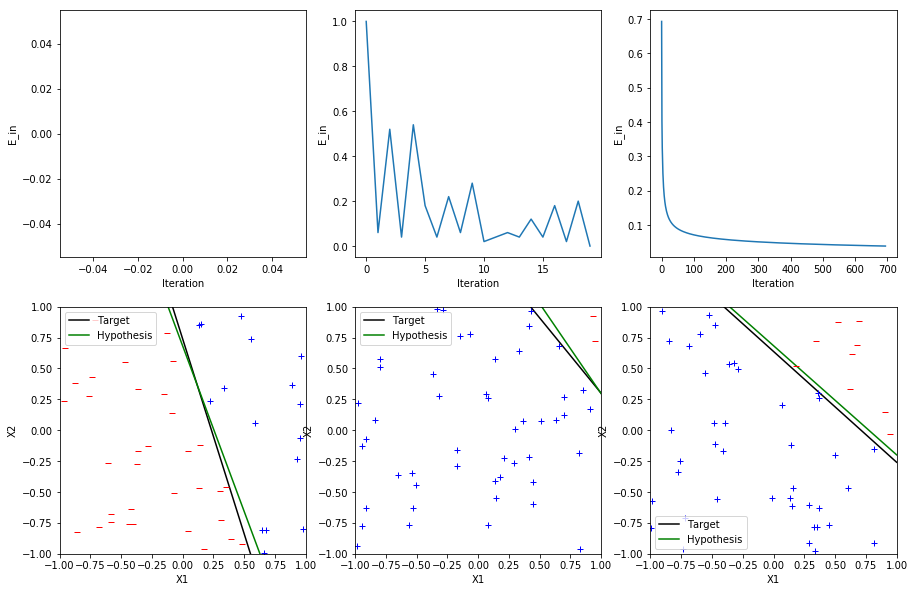

In [3]:
models = [lm.LinearModel(3), lm.Perceptron(3), lm.LogisticRegression(3)]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, model in enumerate(models):
    run(model, 50, plotting=True, axes=axes[:,i])

## Multiple models on same data set

In [4]:
def combinedRun(models, n):
    '''
    Function that compares models on the same data set. Very similar
    to run otherwise.
    '''
    f, line1 = u.genF()
    X, Y = u.genData(f, n)
    
    fig, axes = plt.subplots(2, len(models), figsize=(5 * len(models), 10))
    for i, model in enumerate(models):
        _, E_ins = model.fit(X, Y)
        u.plotE_ins(E_ins, axis=axes[0, i])
        u.plotLine(*line1, axis=axes[1, i], label='Target')
        u.plotLine(*model.boundary2D(), \
                   axis=axes[1, i], color='g', label='Hypothesis')
        u.quickScatter(X, Y, axis=axes[1, i])
        axes[1, i].set_xlim([-1, 1]); axes[1, i].set_ylim([-1, 1])

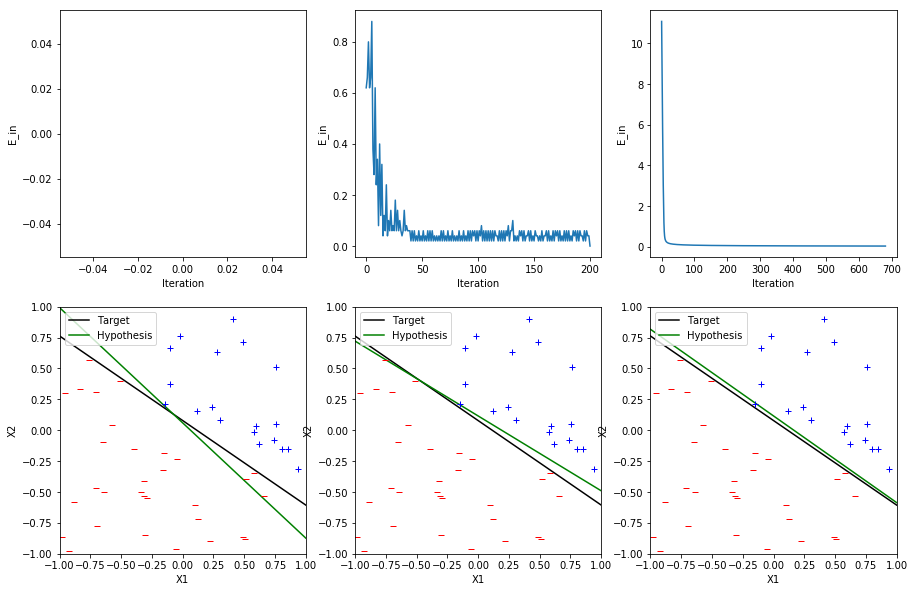

In [5]:
combinedRun(models, 50)

# Decision Tree

In [6]:
f1 = lambda x: (x[0] < -0.3) ^ (x[0] < 0.7)
f2 = lambda x: (np.floor(1 * x[0]) + np.floor(2 * x[1])) % 2
f3, line = u.genF(zero_one=True)

X, Y = u.genData(f2, 1000, appendOnes=False)

In [7]:
d = DecisionTree()
d.fit(X, Y, maxNodes=50)

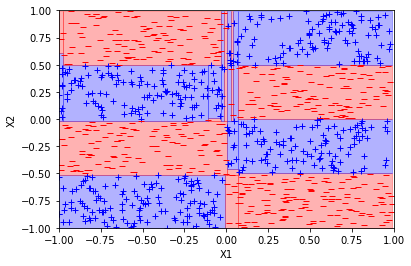

In [8]:
ax = plt.subplot(111)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
#u.plotLine(*line, axis=ax);
d.quickPlot(X, Y, axis=ax)

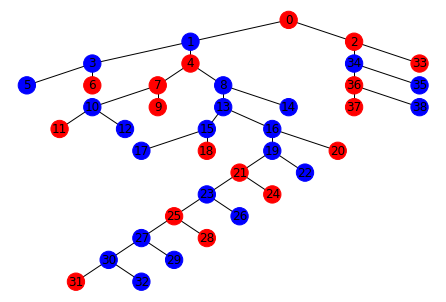

In [9]:
g = d.to_networkx()
pos=tree_layout(g, prog='dot')
colors = ['b' if n['value'] == 1 else 'r' for _, n in g.nodes(data=True)]
nx.draw(g, pos, with_labels=True, arrows=False, node_color=colors)

# Neural Net

### Logistic/Linear regression (to make sure the model works)

In [10]:
def nn_plot_helper(model, X, Y, E_ins, line1):
    fig, ax = plt.subplots(2, 1, figsize=(8,8))
    u.plotE_ins(E_ins, axis=ax[0])
    u.plotLine(*line1, axis=ax[1], label='Target')
    u.plotLine(*model.boundary2D(), color='g', \
                axis=ax[1], label='Hypothesis')
    u.quickScatter(X, Y, axis=ax[1])
    ax[1].set_xlim([-1, 1]); ax[1].set_ylim([-1, 1]);
    return ax
    

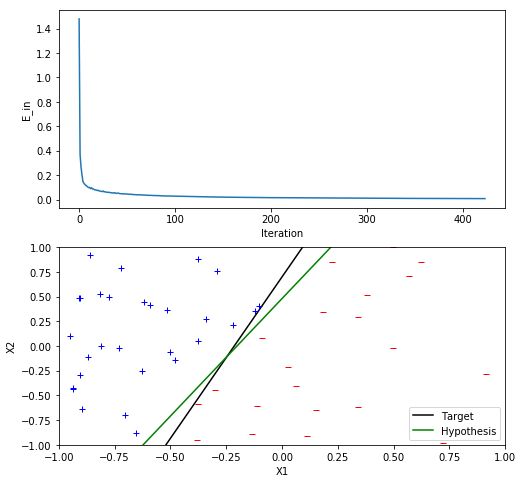

In [11]:
# Do linear regression as a one layer feedforward neural net with 3 feature inputs
f, line1 = u.genF()
X, Y = u.genData(f, 50)

model = nn.NeuralNet(sizes=[3, 1])
it, E_ins = model.fit(X, Y, maxIters=500, trackE_in=True)
nn_plot_helper(model, X, Y, E_ins, line1);

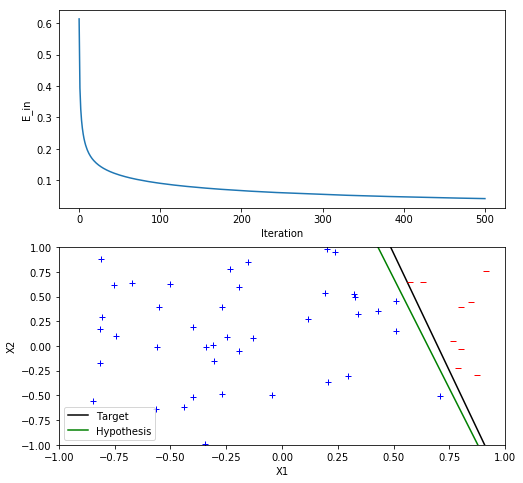

In [12]:
f, line1 = u.genF(zero_one=True) # We want labels to be 0/1 not -1/1
X, Y = u.genData(f, 50)

model = nn.NeuralNet(sizes=[3, 1], loss='log', nonLin='sigmoid')

it, E_ins = model.fit(X, Y, maxIters=500, trackE_in=True)
nn_plot_helper(model, X, Y, E_ins, line1);